 #### Exercício Prático - Interpolação

 ### 3 formas de resolver
 
▪ Resolução do sistema linear visto

▪ Método de Lagrange

▪ Método de Newton


## 1 - Resolução do Sistema Linear Visto - SistemaVandermonde


In [25]:
import numpy as np
from algoritmos import SistemasLineares

def sistemaVandermonde(x,y):
  """Função que resolve um sistema Vandermonde pra obter a função polinomial interpoladora.
  Parâmetros de Entrada:\n
  x = valores de x tabelados em f(x)\n
  y = valores de f(x)\n (x,y) formam os pontos pra gerar a função interpoladora.\n
  Retorno:\n
  Mostra a matriz de Vandermonde.\n
  Mostra o polinômio Interpolador.\n
  Retorna array com os coeficientes da função interpoladora, que é a resolução do sistema linear.\n"""

  #inicializa as variáveis pra guardar os resultados,todas vazias
  n = len(x)
  A = np.empty((n,n))
  b = np.empty((n))

  # popula a matriz de vandermonde
  for i in range(0,n):
    A[i,0] = 1
    for j in range(1,n):
      A[i,j] = A[i,j-1]*x[i] #valor da comula anterior * o x referente a linha
    b[i] = y[i]
  
  print("Matriz de Vandermonde:\n")
  print(A)

  x = np.linalg.solve(A,b)


  print("Polinômio interporlador obtido:")
  p = np.poly1d(np.flip(x))
  print(p)
  return x

In [26]:
# Exemplo

# x e y tabelados
x  = [-1, 0, 2]
fx = [4, 1, -1]
#Resolução

print(sistemaVandermonde(x,fx))

Matriz de Vandermonde:

[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  2.  4.]]
Polinômio interporlador obtido:
        2
0.6667 x - 2.333 x + 1
[ 1.         -2.33333333  0.66666667]


## 2 - Lagrange


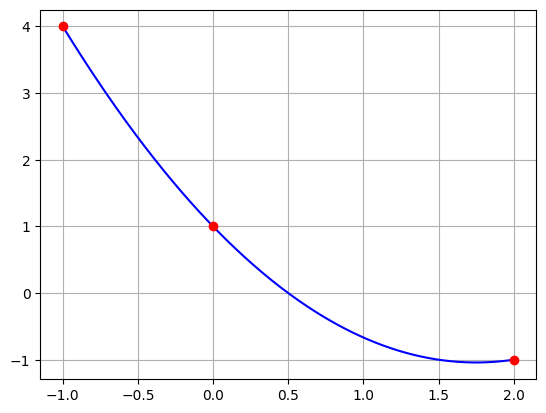

In [29]:

import numpy as np
import matplotlib.pyplot as plt

def interpLagrange(x,y,Intervalo=np.arange(-1.0,2.0,0.01)):
  """Função que encontra o polinômio Interpolador pela forma de Lagrange.\n
  Parâmetros:\n
  x = vetor com valores x pra formação do polinômio Interpolador\n
  y = vetor com os valores de y pra formação da cunção interpoladora\n
  Intervalo = intervalo que será gerada a função Interpoladora. Por padrão recebe o valor de -1 até 2

  A função gera o gráfico da função interpoladora e retorna os valores da função interpoladora nesse intervalo passado por parâmetro
  """
  n =len(x) - 1
  yt = []
  # Valor inicial de g(xp).
  
  for i in Intervalo:
    yp = 0
    # Interpolação de Lagrange
    for k in range(0,n+1):  
      p = 1
      for j in range(0,n+1):
        if k != j:
          p = p*(i - x[j])/(x[k] - x[j])
      
      yp = yp + p * y[k]  
    yt.append(yp)

  plt.plot(Intervalo,yt,'b-')
  plt.plot(x,y,'ro')
  plt.grid()
  plt.show()

  return yt

# Dados do problema.
x = [-1, 0, 2]
y = [4, 1, -1]

# Interpolação de Lagrange.
p=interpLagrange(x,y)


## 3 - Newton

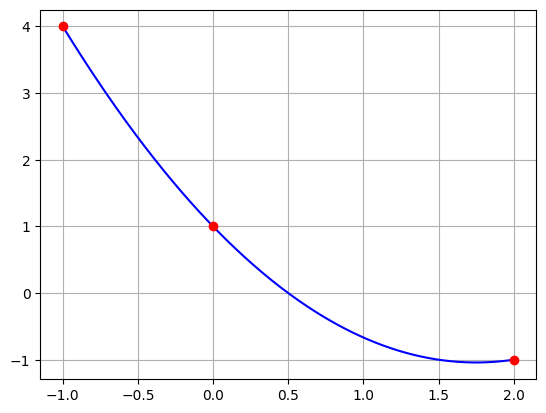

In [30]:
def interpNewton(x,y,Intervalo=np.arange(-1.0,2.0,0.01),ShowGraph=True):
  """"""
  n = len(x)
  fdd = [[None for x in range(n)] for x in range(n)]

  for i in range(n):
    fdd[i][0] = y[i] 

  for j in range(1,n):
    for i in range(n-j):
      fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])

  #fdd_table = pd.DataFrame(fdd)
  #print(fdd_table)
  yt = []

  for xi in Intervalo:
    xterm = 1
    yint  = fdd[0][0]
    for order in range(1,n):
      xterm = xterm*(xi - x[order-1])
      yint  = yint + fdd[0][order]*xterm
  
    yt.append(yint)
    
  if ShowGraph:
    plt.plot(Intervalo,yt,'b-')
    plt.plot(x,y,'ro')
    plt.grid()
    plt.show()

  return yt

x  = [-1, 0, 2]
y  = [4, 1, -1]

p = interpNewton(x,y) 


## Spline 

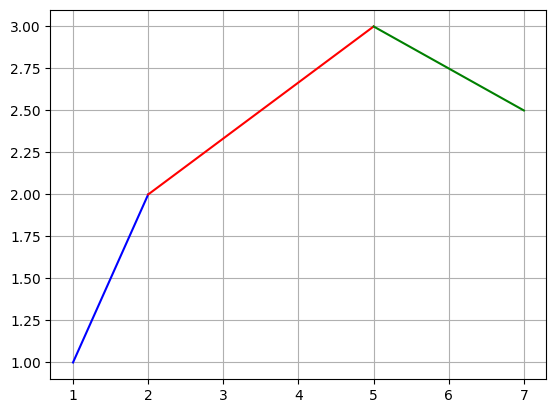

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def splineLinear(xi,xiant,fxi,fxiant,x):
  si = (fxiant*(xi-x))/(xi-xiant) + (fxi*(x-xiant))/(xi-xiant)
  return si

def SLM(xi,xiant,fxi,fxiant,t):
  yt = []  
  for i in t:
    yt.append(splineLinear(xi,xiant,fxi,fxiant,i))
  return yt

# Dados
x  = [1, 2, 5, 7]
fx = [1, 2, 3, 2.5]

t1  = np.linspace(1, 2, 10)
s1 = SLM(x[1],x[0],fx[1],fx[0],t1)

t2  = np.linspace(2, 5, 10)
s2 = SLM(x[2],x[1],fx[2],fx[1],t2)

t3  = np.linspace(5, 7, 10)
s3 = SLM(x[3],x[2],fx[3],fx[2],t3)

plt.plot(t1,s1,'b-')
plt.plot(t2,s2,'r-')
plt.plot(t3,s3,'g-')
plt.grid()
plt.show()

11


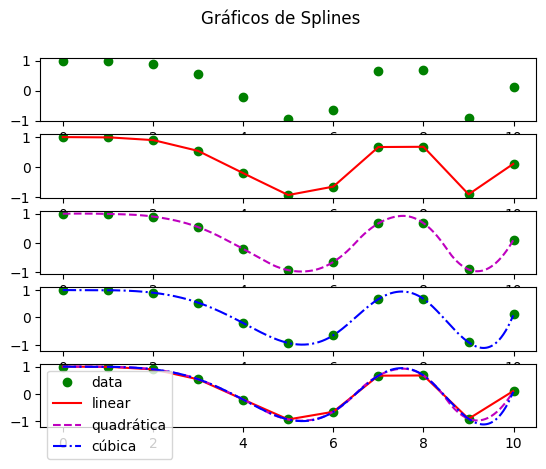

In [2]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, num=11, endpoint=True)
print(len(x))
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y, kind='linear')
f2 = interp1d(x, y, kind='quadratic')
f3 = interp1d(x, y, kind='cubic')


fig, axs = plt.subplots(5)
fig.suptitle('Gráficos de Splines')

xnew = np.arange(0, 10, 0.01)

# Só os pontos.
axs[0].plot(x, y, 'go')

# Pontos e spline linear.
axs[1].plot(x, y, 'go', xnew, f1(xnew), 'r-')

# Pontos e spline quadrática.
axs[2].plot(x, y, 'go', xnew, f2(xnew),'m--')

# Pontos e spline cúbica.
axs[3].plot(x, y, 'go', xnew, f3(xnew), 'b-.')

# Todos os gráficos
axs[4].plot(x, y, 'go', xnew, f1(xnew), 'r-', xnew, f2(xnew), 'm--', xnew, f3(xnew), 'b-.')
axs[4].legend(['data', 'linear', 'quadrática', 'cúbica'], loc='best')
plt.show()